In [13]:

import numpy as np
import pandas as pd
# import ydata_profiling as pp
import matplotlib.pyplot as plt 
import getpass
import seaborn as sns 
%matplotlib inline
import snowflake.connector


ModuleNotFoundError: No module named 'snowflake'

In [ ]:
# import pandas_profiling ---it is updated


In [11]:
# import ydata_profiling as pp     

ModuleNotFoundError: No module named 'ydata_profiling'

In [2]:
import jupyterlab

In [3]:
import  jupyter_scheduler

In [4]:
conn = snowflake.connector.connect(
        user = 'manishanalyst',
        password = getpass.getpass('password'),
        ##password='Manish@1234',
        ##  account = https://bpbqkgp-qd32415.snowflakecomputing.com---https://plfzael-lc28642.snowflakecomputing.com
        account = 'plfzael-lc28642',
        database='RETAILS',
        schema='PUBLIC',
        warehouse='COMPUTE_WH',
  ) 

NameError: name 'snowflake' is not defined

In [7]:
cur = conn.cursor()
  


In [8]:
select_demographic_RAW = 'SELECT * FROM demographic_RAW'
select_CAMPAIGN_DESC_RAW = 'SELECT * FROM CAMPAIGN_DESC_RAW'
select_CAMPAIGN_RAW = 'SELECT * FROM CAMPAIGN_RAW'
select_PRODUCT_RAW = 'SELECT * FROM PRODUCT_RAW'
select_COUPON_RAW = 'SELECT * FROM COUPON_RAW'
select_COUPON_REDEMPT_RAW = 'SELECT * FROM COUPON_REDEMPT_RAW'
select_TRANSACTION_RAW = 'SELECT * FROM TRANSACTION_RAW'

In [9]:
cur.execute(select_demographic_RAW)
demographic_RAW = cur.fetch_pandas_all()

cur.execute(select_CAMPAIGN_DESC_RAW)
CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()

cur.execute(select_CAMPAIGN_RAW)
CAMPAIGN_RAW = cur.fetch_pandas_all()

cur.execute(select_PRODUCT_RAW)
PRODUCT_RAW = cur.fetch_pandas_all()

cur.execute(select_COUPON_RAW)
COUPON_RAW = cur.fetch_pandas_all()

cur.execute(select_COUPON_REDEMPT_RAW)
COUPON_REDEMPT_RAW = cur.fetch_pandas_all()

cur.execute(select_TRANSACTION_RAW)
TRANSACTION_RAW = cur.fetch_pandas_all()

In [10]:
COUPON_RAW

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25
...,...,...,...
124543,10000085478,13038802,18
124544,10000085479,13039368,18
124545,10000085478,13039553,18
124546,10000085479,13776332,18


In [11]:
COUPON_REDEMPT_RAW

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18
...,...,...,...,...
2313,2496,592,54900050076,18
2314,2496,610,55100000013,18
2315,2500,449,53663200076,8
2316,2500,449,54300031076,8


In [12]:
PRODUCT_RAW


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [13]:
CAMPAIGN_RAW


,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26
...,...,...,...
7203,TypeC,1803,15
7204,TypeC,1082,15
7205,TypeC,942,15
7206,TypeC,855,15


In [14]:
demographic_RAW


,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16
...,...,...,...,...,...,...,...,...
2495,25-34,U,15-24K,Homeowner,2 Adults Kids,4,2,444
2496,45-54,U,125-149K,Homeowner,1 Adult Kids,5+,3+,917
2497,45-54,U,50-74K,Homeowner,Unknown,1,None/Unknown,1727
2498,19-24,A,35-49K,Renter,2 Adults No Kids,2,None/Unknown,11


In [15]:
CAMPAIGN_DESC_RAW


,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684
5,TypeB,21,624,656
6,TypeB,22,624,656
7,TypeA,18,587,642
8,TypeB,19,603,635
9,TypeB,17,575,607


In [16]:
TRANSACTION_RAW

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
450411,916,29339646926,176,887342,1,1.50,436,-0.46,1732,26,0,0
450412,916,29339646926,176,942778,1,2.99,436,0.00,1732,26,0,0
450413,2086,29339647754,176,868764,3,4.00,436,-0.77,2203,26,0,0
450414,2086,29339647754,176,1093413,1,0.76,436,0.00,2203,26,0,0


In [17]:
cur.close()
conn.close()

In [18]:
demographic_RAW.head(5)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [19]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [20]:
CAMPAIGN_RAW.head(5)

,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [21]:
PRODUCT_RAW.head(5)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [22]:
COUPON_RAW.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [23]:
COUPON_REDEMPT_RAW.head(5)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [24]:
TRANSACTION_RAW.head(5)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0


In [25]:
demographic_RAW.shape

(2500, 8)

In [26]:
CAMPAIGN_DESC_RAW.shape

(30, 4)

In [27]:
CAMPAIGN_RAW.shape

(7208, 3)

In [28]:
PRODUCT_RAW.shape

(92353, 7)

In [29]:
COUPON_RAW.shape

(124548, 3)

In [30]:
COUPON_REDEMPT_RAW.shape

(2318, 4)

In [31]:
TRANSACTION_RAW.shape

(450416, 12)

In [32]:
demographic_RAW.isnull().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
HOUSEHOLD_KEY          0
dtype: int64

In [33]:
CAMPAIGN_DESC_RAW.isnull().sum()

DESCRIPTION    0
CAMPAIGN       0
START_DAY      0
END_DAY        0
dtype: int64

In [34]:
CAMPAIGN_RAW.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [35]:
PRODUCT_RAW.isnull().sum()

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [36]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [37]:
COUPON_REDEMPT_RAW.isnull().sum()

HOUSEHOLD_KEY    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

In [38]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [39]:
demographic_RAW.describe()

,HOUSEHOLD_KEY
count,2500.00000
mean,1250.50000
std,721.83216
min,1.00000
25%,625.75000
50%,1250.50000
75%,1875.25000
max,2500.00000


In [40]:
CAMPAIGN_DESC_RAW.describe()

,CAMPAIGN,START_DAY,END_DAY
count,30.000000,30.000000,30.000000
mean,15.500000,463.866667,510.466667
std,8.803408,134.488490,137.730555
min,1.000000,224.000000,264.000000
25%,8.250000,360.000000,405.750000
50%,15.500000,470.000000,502.000000
75%,22.750000,584.000000,640.250000
max,30.000000,659.000000,719.000000


In [41]:
CAMPAIGN_RAW.describe()

,HOUSEHOLD_KEY,CAMPAIGN
count,7208.000000,7208.000000
mean,1268.696726,15.659545
std,731.936391,6.949705
min,1.000000,1.000000
25%,644.000000,9.000000
50%,1263.000000,14.000000
75%,1924.000000,20.000000
max,2500.000000,30.000000


In [42]:
PRODUCT_RAW.describe()

,PRODUCT_ID,MANUFACTURER
count,9.235300e+04,92353.00000
mean,5.328353e+06,1739.22833
std,5.359937e+06,1818.26957
min,2.567100e+04,1.00000
25%,9.706280e+05,328.00000
50%,1.621091e+06,1094.00000
75%,9.704770e+06,2264.00000
max,1.831630e+07,6477.00000


In [43]:
COUPON_RAW.describe()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
count,1.245480e+05,1.245480e+05,124548.000000
mean,2.198225e+10,4.651277e+06,15.855935
std,1.961641e+10,4.843450e+06,6.015524
min,1.000009e+10,2.567100e+04,1.000000
25%,1.000009e+10,9.593030e+05,13.000000
50%,1.000009e+10,1.411451e+06,14.000000
75%,5.111108e+10,8.357538e+06,18.000000
max,5.998660e+10,1.814854e+07,30.000000


In [44]:
COUPON_REDEMPT_RAW.describe()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
count,2318.000000,2318.000000,2.318000e+03,2318.000000
mean,1302.816652,528.217429,4.123049e+10,15.551337
std,783.002545,100.360985,1.986068e+10,5.716636
min,1.000000,225.000000,1.000009e+10,1.000000
25%,588.000000,458.250000,1.000009e+10,13.000000
50%,1396.500000,532.000000,5.234003e+10,14.000000
75%,2004.000000,605.000000,5.430002e+10,18.000000
max,2500.000000,704.000000,5.897850e+10,30.000000


In [45]:
TRANSACTION_RAW.describe()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,450416.00000,4.504160e+05,450416.000000,4.504160e+05,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000,450416.000000
mean,1259.55822,2.840143e+10,112.470718,2.209464e+06,86.522561,3.018436,2586.661648,-0.552774,1583.582364,16.754487,-0.014860,-0.001920
std,728.10869,5.792110e+08,42.064258,2.726512e+06,1058.788785,3.860427,7996.435988,1.186736,415.130098,6.018864,0.195378,0.044335
min,1.00000,2.698485e+10,1.000000,2.567100e+04,0.000000,0.000000,1.000000,-75.000000,0.000000,1.000000,-17.000000,-3.000000
25%,641.00000,2.798531e+10,84.000000,9.118780e+05,1.000000,1.250000,330.000000,-0.740000,1317.000000,13.000000,0.000000,0.000000
50%,1234.00000,2.839168e+10,117.000000,1.016800e+06,1.000000,2.000000,369.000000,-0.090000,1630.000000,17.000000,0.000000,0.000000
75%,1914.00000,2.886773e+10,147.000000,1.115360e+06,1.000000,3.390000,421.000000,0.000000,1906.000000,22.000000,0.000000,0.000000
max,2500.00000,2.933965e+10,176.000000,1.260019e+07,51912.000000,400.000000,32124.000000,0.000000,2359.000000,26.000000,0.000000,0.000000


In [46]:
from datetime import datetime,timedelta

In [47]:
start_date=pd.to_datetime('2019-01-01')

In [48]:
start_date

Timestamp('2019-01-01 00:00:00')

In [49]:
TRANSACTION_RAW['Date']= start_date + pd.to_timedelta(TRANSACTION_RAW['DAY'], unit ='D')

In [50]:
TRANSACTION_RAW

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2019-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2019-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2019-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2019-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2019-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450411,916,29339646926,176,887342,1,1.50,436,-0.46,1732,26,0,0,2019-06-26
450412,916,29339646926,176,942778,1,2.99,436,0.00,1732,26,0,0,2019-06-26
450413,2086,29339647754,176,868764,3,4.00,436,-0.77,2203,26,0,0,2019-06-26
450414,2086,29339647754,176,1093413,1,0.76,436,0.00,2203,26,0,0,2019-06-26


In [51]:
COUPON_REDEMPT_RAW['Date']=start_date + pd.to_timedelta(COUPON_REDEMPT_RAW['DAY'], unit ='D')

In [52]:
COUPON_REDEMPT_RAW.head(20)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2020-02-26
1,1,421,51700010076,8,2020-02-26
2,1,427,54200000033,8,2020-03-03
3,1,597,10000085476,18,2020-08-20
4,1,597,54200029176,18,2020-08-20
5,8,422,53600000078,8,2020-02-27
6,13,396,53700048182,5,2020-02-01
7,13,424,10000085364,8,2020-02-29
8,13,434,53600000078,8,2020-03-10
9,13,447,52370020076,8,2020-03-23


In [53]:
CAMPAIGN_DESC_RAW['start_Date']=start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY'], unit ='D')
CAMPAIGN_DESC_RAW['End_Date']=start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY'], unit ='D')


In [54]:
CAMPAIGN_DESC_RAW.head(40)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,start_Date,End_Date
0,TypeB,24,659,719,2020-10-21,2020-12-20
1,TypeC,15,547,708,2020-07-01,2020-12-09
2,TypeB,25,659,691,2020-10-21,2020-11-22
3,TypeC,20,615,685,2020-09-07,2020-11-16
4,TypeB,23,646,684,2020-10-08,2020-11-15
5,TypeB,21,624,656,2020-09-16,2020-10-18
6,TypeB,22,624,656,2020-09-16,2020-10-18
7,TypeA,18,587,642,2020-08-10,2020-10-04
8,TypeB,19,603,635,2020-08-26,2020-09-27
9,TypeB,17,575,607,2020-07-29,2020-08-30


In [55]:
CAMPAIGN_DESC_RAW['campaign_Duration']=CAMPAIGN_DESC_RAW['END_DAY']-CAMPAIGN_DESC_RAW['START_DAY']

In [56]:
TRANSACTION_RAW['Date'].max()

Timestamp('2019-06-26 00:00:00')

In [57]:
CAMPAIGN_DESC_RAW['End_Date'].max()

Timestamp('2020-12-20 00:00:00')

In [58]:
COUPON_REDEMPT_RAW['Date'].max()

Timestamp('2020-12-05 00:00:00')

In [59]:
demographic_RAW

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16
...,...,...,...,...,...,...,...,...
2495,25-34,U,15-24K,Homeowner,2 Adults Kids,4,2,444
2496,45-54,U,125-149K,Homeowner,1 Adult Kids,5+,3+,917
2497,45-54,U,50-74K,Homeowner,Unknown,1,None/Unknown,1727
2498,19-24,A,35-49K,Renter,2 Adults No Kids,2,None/Unknown,11


In [60]:
demographic_RAW['AGE_DESC'].value_counts()

AGE_DESC
45-54    901
35-44    594
25-34    445
65+      230
55-64    187
19-24    143
Name: count, dtype: int64

In [61]:
demographic_RAW['HOUSEHOLD_SIZE_DESC'].value_counts()

HOUSEHOLD_SIZE_DESC
2     1004
1      783
3      338
5+     206
4      169
Name: count, dtype: int64

In [62]:
CAMPAIGN_DESC_RAW['campaign_Duration'].mean()

46.6

<Axes: xlabel='CAMPAIGN', ylabel='campaign_Duration'>

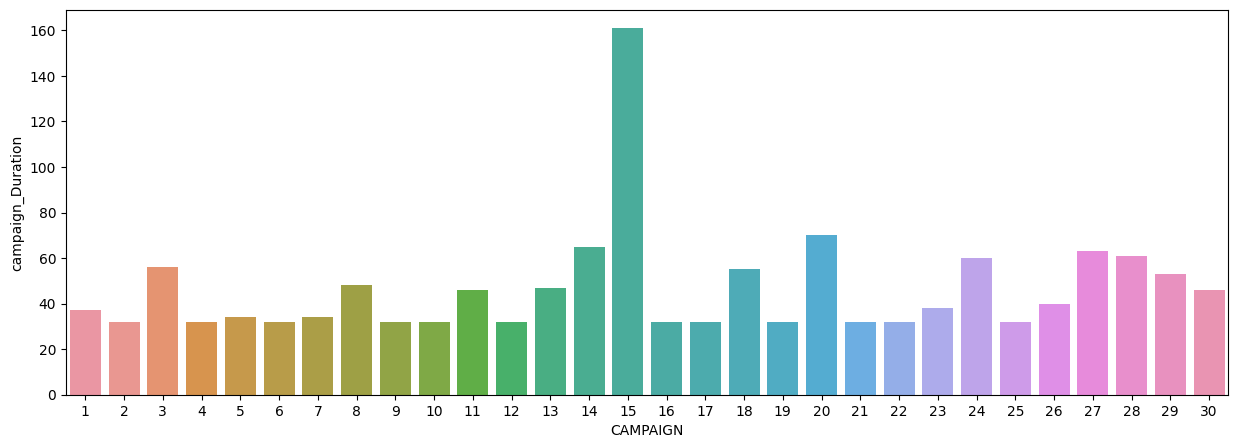

In [63]:
plt.figure( figsize=(15,5),)
sns.barplot(x='CAMPAIGN',y='campaign_Duration',data=CAMPAIGN_DESC_RAW)

In [64]:
CAMPAIGN_DESC_RAW.groupby('DESCRIPTION').aggregate({'CAMPAIGN':'count','campaign_Duration':'mean'})

,CAMPAIGN,campaign_Duration
DESCRIPTION,,
TypeA,5,47.200000
TypeB,19,37.631579
TypeC,6,74.500000


In [65]:
CAMPAIGN_DESC_RAW['start_Month']=CAMPAIGN_DESC_RAW['start_Date'].dt.strftime('%m')

In [66]:
CAMPAIGN_DESC_RAW['END_Month']=CAMPAIGN_DESC_RAW['End_Date'].dt.strftime('%m')

In [67]:
CAMPAIGN_DESC_RAW['start_year']=CAMPAIGN_DESC_RAW['start_Date'].dt.strftime('%Y')

In [68]:
CAMPAIGN_DESC_RAW['END_year']=CAMPAIGN_DESC_RAW['End_Date'].dt.strftime('%Y')

In [69]:
CAMPAIGN_DESC_RAW

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,start_Date,End_Date,campaign_Duration,start_Month,END_Month,start_year,END_year
0,TypeB,24,659,719,2020-10-21,2020-12-20,60,10,12,2020,2020
1,TypeC,15,547,708,2020-07-01,2020-12-09,161,07,12,2020,2020
2,TypeB,25,659,691,2020-10-21,2020-11-22,32,10,11,2020,2020
3,TypeC,20,615,685,2020-09-07,2020-11-16,70,09,11,2020,2020
4,TypeB,23,646,684,2020-10-08,2020-11-15,38,10,11,2020,2020
5,TypeB,21,624,656,2020-09-16,2020-10-18,32,09,10,2020,2020
6,TypeB,22,624,656,2020-09-16,2020-10-18,32,09,10,2020,2020
7,TypeA,18,587,642,2020-08-10,2020-10-04,55,08,10,2020,2020
8,TypeB,19,603,635,2020-08-26,2020-09-27,32,08,09,2020,2020
9,TypeB,17,575,607,2020-07-29,2020-08-30,32,07,08,2020,2020


In [70]:
CAMPAIGN_RAW['HOUSEHOLD_KEY'].nunique()

1584

Out of 2500 household 1584 where participated in campaign 916 household not participated in any compaing

In [71]:
TRANSACTION_RAW['HOUSEHOLD_KEY'].nunique()

2494

In [72]:
CAMPAIGN_RAW.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count()

CAMPAIGN
1       13
2       48
3       12
4       81
5      166
6       65
7      198
8     1076
9      176
10     123
11     214
12     170
13    1077
14     224
15      17
16     188
17     202
18    1133
19     130
20     244
21      65
22     276
23     183
24     100
25     187
26     332
27      12
28      17
29     118
30     361
Name: HOUSEHOLD_KEY, dtype: int64

Text(0, 0.5, 'No of Household to reach')

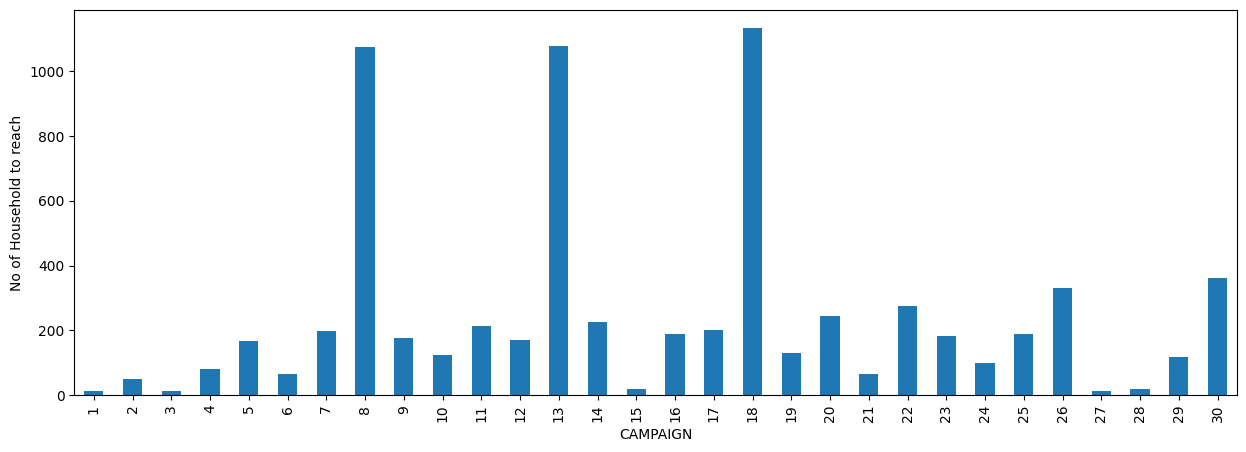

In [73]:
plt.figure( figsize=(15,5))
CAMPAIGN_RAW.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count().plot.bar()
plt.ylabel('No of Household to reach')

campaign no 8,13 and 18 are performing realy well and rest all are average 


In [74]:
coupan_given=COUPON_RAW.groupby('CAMPAIGN').aggregate(total_product=('PRODUCT_ID','nunique'),total_coupon_given=('COUPON_UPC','nunique'))

In [75]:
coupan_given.sort_values(by='total_product', ascending=False)



,total_product,total_coupon_given
CAMPAIGN,,
13,35616,207
18,35513,209
8,17178,209
26,3396,181
30,3205,181
22,1917,21
24,1887,2
16,1025,13
25,826,17


In [76]:
COUPON_RAW


,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25
...,...,...,...
124543,10000085478,13038802,18
124544,10000085479,13039368,18
124545,10000085478,13039553,18
124546,10000085479,13776332,18


In [77]:
# coupan_given=pd.merge(coupan_given,CAMPAIGN_DESC_RAW,on='CAMPAIGN',how='left', suffixes=('_left', '_right'))--chat_gpt
coupan_given=coupan_given.merge(right=CAMPAIGN_DESC_RAW,on='CAMPAIGN',how='left') 


In [78]:
coupan_given.head(10)


,CAMPAIGN,total_product,total_coupon_given,DESCRIPTION,START_DAY,END_DAY,start_Date,End_Date,campaign_Duration,start_Month,END_Month,start_year,END_year
0,1,383,11,TypeB,346,383,2019-12-13,2020-01-19,37,12,01,2019,2020
1,2,301,16,TypeB,351,383,2019-12-18,2020-01-19,32,12,01,2019,2020
2,3,506,34,TypeC,356,412,2019-12-23,2020-02-17,56,12,02,2019,2020
3,4,200,12,TypeB,372,404,2020-01-08,2020-02-09,32,01,02,2020,2020
4,5,443,11,TypeB,377,411,2020-01-13,2020-02-16,34,01,02,2020,2020
5,6,18,1,TypeC,393,425,2020-01-29,2020-03-01,32,01,03,2020,2020
6,7,259,8,TypeB,398,432,2020-02-03,2020-03-08,34,02,03,2020,2020
7,8,17178,209,TypeA,412,460,2020-02-17,2020-04-05,48,02,04,2020,2020
8,9,825,18,TypeB,435,467,2020-03-11,2020-04-12,32,03,04,2020,2020
9,10,393,14,TypeB,463,495,2020-04-08,2020-05-10,32,04,05,2020,2020


In [79]:
coupan_given.columns

Index(['CAMPAIGN', 'total_product', 'total_coupon_given', 'DESCRIPTION',
       'START_DAY', 'END_DAY', 'start_Date', 'End_Date', 'campaign_Duration',
       'start_Month', 'END_Month', 'start_year', 'END_year'],
      dtype='object')

In [80]:
coupan_given.loc[:,('CAMPAIGN','total_product','total_coupon_given','start_year', 'start_Month','END_Month','DESCRIPTION','campaign_Duration')].sort_values(by='total_product',ascending=False)

,CAMPAIGN,total_product,total_coupon_given,start_year,start_Month,END_Month,DESCRIPTION,campaign_Duration
12,13,35616,207,2020,05,07,TypeA,47
17,18,35513,209,2020,08,10,TypeA,55
7,8,17178,209,2020,02,04,TypeA,48
25,26,3396,181,2019,08,09,TypeA,40
29,30,3205,181,2019,11,01,TypeA,46
21,22,1917,21,2020,09,10,TypeB,32
23,24,1887,2,2020,10,12,TypeB,60
15,16,1025,13,2020,07,08,TypeB,32
24,25,826,17,2020,10,11,TypeB,32
8,9,825,18,2020,03,04,TypeB,32


# CAMPAIGN 13,18 and 8 are one with most product on them 

In [81]:
COUPON_RAW.head(10)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25
5,52100000031,28929,22
6,52100000033,28929,9
7,52100026076,28929,28
8,52100020075,28929,1
9,52100000076,29096,25


In [82]:
PRODUCT_RAW.head(10)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
5,26426,69,GROCERY,Private,SPICES & EXTRACTS,SPICES & SEASONINGS,2.5 OZ
6,26540,69,GROCERY,Private,COOKIES/CONES,TRAY PACK/CHOC CHIP COOKIES,16 OZ
7,26601,69,DRUG GM,Private,VITAMINS,VITAMIN - MINERALS,300CT(1)
8,26636,69,PASTRY,Private,BREAKFAST SWEETS,SW GDS: SW ROLLS/DAN,
9,26691,16,GROCERY,Private,PNT BTR/JELLY/JAMS,HONEY,12 OZ


In [83]:
COUPON_PRODUCT=COUPON_RAW.merge(right=PRODUCT_RAW,on='PRODUCT_ID',how='left').sort_values(by='PRODUCT_ID',ascending=False)

In [84]:
COUPON_PRODUCT.head(10)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
21654,52840000033,18148540,25,544,GROCERY,National,BAG SNACKS,TORTILLA/NACHO CHIPS,12 OZ
21650,54589399250,18122531,14,2296,DRUG GM,National,HAIR CARE PRODUCTS,HAIR CONDITIONERS AND RINSES,22.5 OZ
21651,54589399275,18122531,14,2296,DRUG GM,National,HAIR CARE PRODUCTS,HAIR CONDITIONERS AND RINSES,22.5 OZ
21652,57940011075,18122531,27,2296,DRUG GM,National,HAIR CARE PRODUCTS,HAIR CONDITIONERS AND RINSES,22.5 OZ
21653,57940011080,18122531,27,2296,DRUG GM,National,HAIR CARE PRODUCTS,HAIR CONDITIONERS AND RINSES,22.5 OZ
122766,10000085475,18105264,18,6082,PRODUCE,National,BERRIES,BLACKBERRIES,1/2 PT
123034,10000085475,18104791,18,2489,FLORAL,National,FLORAL-FRESH CUT,CARNATIONS,8 STEM
122730,10000085475,18056453,18,1378,NUTRITION,National,DRIED FRUIT,DRIED FRUIT - OTHER,.71 OZ
122986,10000085475,18056452,18,1378,NUTRITION,National,DRIED FRUIT,DRIED FRUIT - OTHER,.71 OZ
122709,10000085475,18056451,18,1378,NUTRITION,National,DRIED FRUIT,DRIED FRUIT - OTHER,.71 OZ


In [85]:
COUPON_PRODUCT['COMMODITY_DESC'].value_counts().head(10)

COMMODITY_DESC
HAIR CARE PRODUCTS        6261
MAKEUP AND TREATMENT      5585
FRZN MEAT/MEAT DINNERS    4893
FROZEN PIZZA              3658
BEEF                      3314
ICE CREAM/MILK/SHERBTS    3257
CHEESE                    3146
YOGURT                    2460
ORAL HYGIENE PRODUCTS     2437
LUNCHMEAT                 2425
Name: count, dtype: int64

In [86]:
COUPON_REDEMPT_RAW['COUPON_UPC'].nunique()

556

only 556 coupon are redim out of 1135

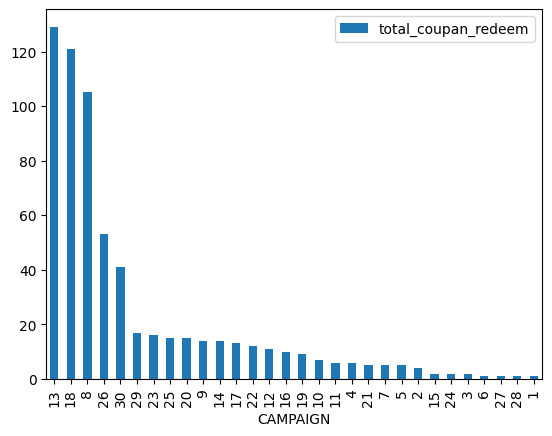

In [87]:
coupan_redeem=COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupan_redeem=('COUPON_UPC', 'nunique')).sort_values(by='total_coupan_redeem',ascending=False).plot.bar()

In [88]:
coupan_redeem=COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupan_redeem=('COUPON_UPC', 'nunique')).sort_values(by='total_coupan_redeem',ascending=False)

In [89]:
coupan_redeem=coupan_redeem.merge(right=coupan_given,on='CAMPAIGN',how='left')


In [90]:
coupan_redeem


,CAMPAIGN,total_coupan_redeem,total_product,total_coupon_given,DESCRIPTION,START_DAY,END_DAY,start_Date,End_Date,campaign_Duration,start_Month,END_Month,start_year,END_year
0,13,129,35616,207,TypeA,504,551,2020-05-19,2020-07-05,47,05,07,2020,2020
1,18,121,35513,209,TypeA,587,642,2020-08-10,2020-10-04,55,08,10,2020,2020
2,8,105,17178,209,TypeA,412,460,2020-02-17,2020-04-05,48,02,04,2020,2020
3,26,53,3396,181,TypeA,224,264,2019-08-13,2019-09-22,40,08,09,2019,2019
4,30,41,3205,181,TypeA,323,369,2019-11-20,2020-01-05,46,11,01,2019,2020
5,29,17,689,33,TypeB,281,334,2019-10-09,2019-12-01,53,10,12,2019,2019
6,23,16,767,18,TypeB,646,684,2020-10-08,2020-11-15,38,10,11,2020,2020
7,25,15,826,17,TypeB,659,691,2020-10-21,2020-11-22,32,10,11,2020,2020
8,20,15,609,24,TypeC,615,685,2020-09-07,2020-11-16,70,09,11,2020,2020
9,9,14,825,18,TypeB,435,467,2020-03-11,2020-04-12,32,03,04,2020,2020


In [91]:
coupan_redeem['coupan_redeem_rate']=coupan_redeem['total_coupan_redeem']/coupan_redeem['total_coupon_given']*100

In [92]:
coupan_redeem.sort_values(by='coupan_redeem_rate',ascending=False)

,CAMPAIGN,total_coupan_redeem,total_product,total_coupon_given,DESCRIPTION,START_DAY,END_DAY,start_Date,End_Date,campaign_Duration,start_Month,END_Month,start_year,END_year,coupan_redeem_rate
26,6,1,18,1,TypeC,393,425,2020-01-29,2020-03-01,32,01,03,2020,2020,100.000000
24,24,2,1887,2,TypeB,659,719,2020-10-21,2020-12-20,60,10,12,2020,2020,100.000000
23,15,2,55,2,TypeC,547,708,2020-07-01,2020-12-09,161,07,12,2020,2020,100.000000
6,23,16,767,18,TypeB,646,684,2020-10-08,2020-11-15,38,10,11,2020,2020,88.888889
7,25,15,826,17,TypeB,659,691,2020-10-21,2020-11-22,32,10,11,2020,2020,88.235294
15,19,9,375,11,TypeB,603,635,2020-08-26,2020-09-27,32,08,09,2020,2020,81.818182
9,9,14,825,18,TypeB,435,467,2020-03-11,2020-04-12,32,03,04,2020,2020,77.777778
14,16,10,1025,13,TypeB,561,593,2020-07-15,2020-08-16,32,07,08,2020,2020,76.923077
13,12,11,620,15,TypeB,477,509,2020-04-22,2020-05-24,32,04,05,2020,2020,73.333333
11,17,13,713,19,TypeB,575,607,2020-07-29,2020-08-30,32,07,08,2020,2020,68.421053


<Axes: xlabel='CAMPAIGN', ylabel='coupan_redeem_rate'>

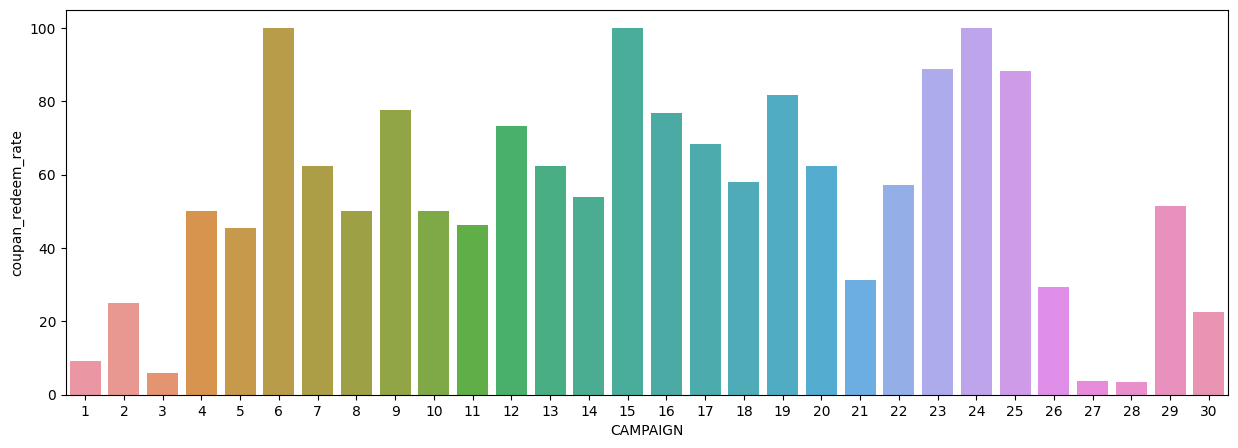

In [93]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y='coupan_redeem_rate',data=coupan_redeem)

In [94]:
TRANSACTION_RAW


,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2019-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2019-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2019-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2019-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2019-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450411,916,29339646926,176,887342,1,1.50,436,-0.46,1732,26,0,0,2019-06-26
450412,916,29339646926,176,942778,1,2.99,436,0.00,1732,26,0,0,2019-06-26
450413,2086,29339647754,176,868764,3,4.00,436,-0.77,2203,26,0,0,2019-06-26
450414,2086,29339647754,176,1093413,1,0.76,436,0.00,2203,26,0,0,2019-06-26


In [95]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
Date                 0
dtype: int64

In [96]:
TRANSACTION_RAW['BASKET_ID'].count()

450416

In [97]:
TRANSACTION_RAW['BASKET_ID'].nunique()

50479

In [98]:
TRANSACTION_RAW['HOUSEHOLD_KEY'].nunique()

2494

In [99]:
trnx_bucket=TRANSACTION_RAW.groupby('BASKET_ID').agg({'SALES_VALUE':'sum','COUPON_DISC':'sum','COUPON_MATCH_DISC':'sum'})


In [100]:
trnx_bucket

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC
BASKET_ID,,,
26984851472,5.91,0,0
26984851516,12.43,0,0
26984896261,11.37,0,0
26984905972,2.55,0,0
26984945254,3.53,0,0
...,...,...,...
29339646001,51.65,-1,0
29339646267,36.92,0,0
29339646399,3.99,0,0


In [101]:
trnx_bucket['use_coupon']=trnx_bucket['COUPON_DISC']!=0

In [102]:
trnx_bucket['use_coupon'].value_counts()

use_coupon
False    47892
True      2587
Name: count, dtype: int64

In [103]:
trnx_bucket

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,use_coupon
BASKET_ID,,,,
26984851472,5.91,0,0,False
26984851516,12.43,0,0,False
26984896261,11.37,0,0,False
26984905972,2.55,0,0,False
26984945254,3.53,0,0,False
...,...,...,...,...
29339646001,51.65,-1,0,True
29339646267,36.92,0,0,False
29339646399,3.99,0,0,False


In [104]:
trnx_bucket.sort_values(by='SALES_VALUE',ascending=False)

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,use_coupon
BASKET_ID,,,,
27534431747,465.70,-3,-1,True
27798435271,463.17,-2,-2,True
27093315740,400.79,0,0,False
28941937397,400.56,-1,0,True
28210676830,391.05,0,0,False
...,...,...,...,...
27785875120,0.00,0,0,False
28787911801,0.00,0,0,False
27785916151,0.00,0,0,False


In [105]:
round(trnx_bucket['SALES_VALUE'].mean(),2)

26.93

Text(0.5, 1.0, 'bucket value boxplot')

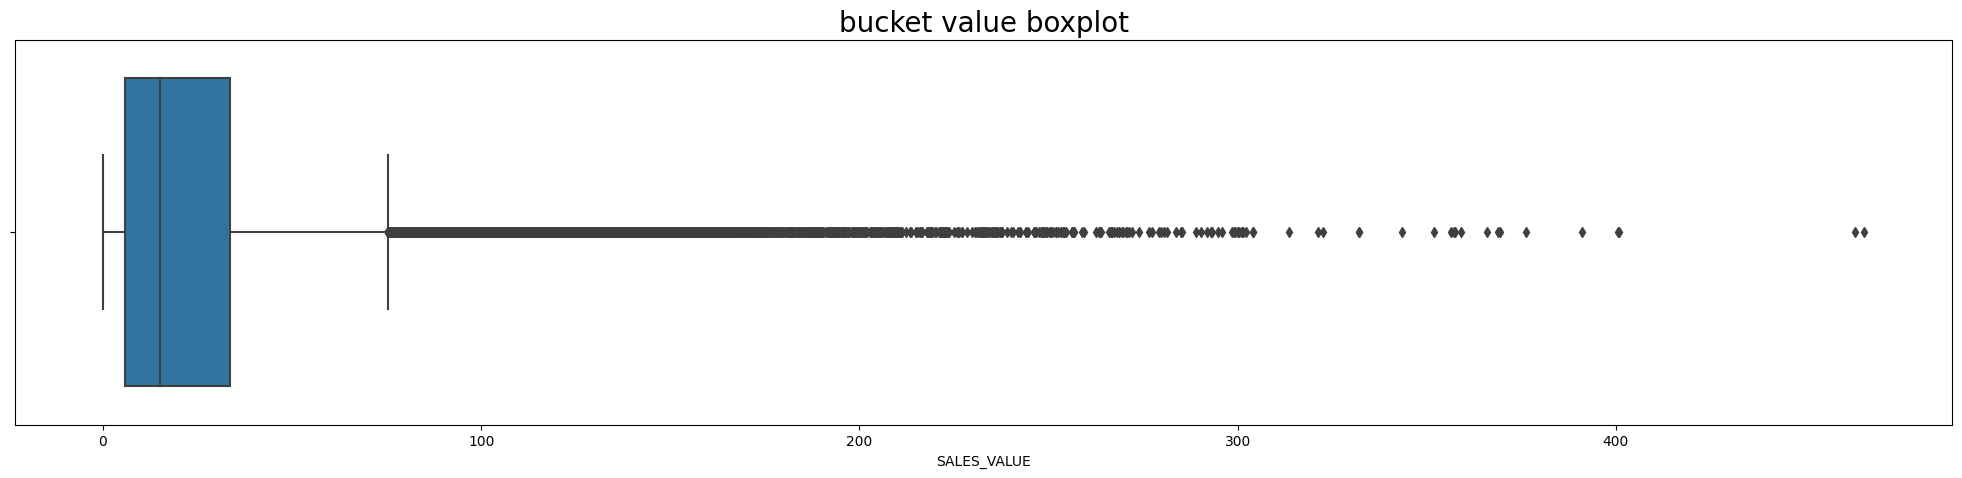

In [106]:
plt.figure(figsize=(25,5))
sns.boxplot(x=trnx_bucket['SALES_VALUE'])
plt.title("bucket value boxplot", fontsize=20)

In [107]:
trnx_bucket.groupby('use_coupon').aggregate(sales_mean=('SALES_VALUE','mean')
                                            ,COUPON_DISC_MEAN=('COUPON_DISC','mean'),
                                           COUPON_MATCH_DISC=('COUPON_MATCH_DISC','mean'),
                                            No_coupon=('SALES_VALUE','count'))

,sales_mean,COUPON_DISC_MEAN,COUPON_MATCH_DISC,No_coupon
use_coupon,,,,
False,25.009980,0.000000,0.000000,47892
True,62.533348,-2.587167,-0.334364,2587


In [108]:
trnx_desc=TRANSACTION_RAW.merge(right=trnx_bucket,on='BASKET_ID',how='left')

In [109]:
trnx_desc

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,use_coupon
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2019-01-02,5.91,0,0,False
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2019-01-02,5.91,0,0,False
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2019-01-02,5.91,0,0,False
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2019-01-02,5.91,0,0,False
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2019-01-02,5.91,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450411,916,29339646926,176,887342,1,1.50,436,-0.46,1732,26,0,0,2019-06-26,5.99,0,0,False
450412,916,29339646926,176,942778,1,2.99,436,0.00,1732,26,0,0,2019-06-26,5.99,0,0,False
450413,2086,29339647754,176,868764,3,4.00,436,-0.77,2203,26,0,0,2019-06-26,7.59,0,0,False
450414,2086,29339647754,176,1093413,1,0.76,436,0.00,2203,26,0,0,2019-06-26,7.59,0,0,False


In [110]:
trnx_desc=trnx_desc.merge(right=PRODUCT_RAW,on='PRODUCT_ID',how='left')

In [111]:
trnx_desc


,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,...,5.91,0,0,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,...,5.91,0,0,False,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,...,5.91,0,0,False,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450411,916,29339646926,176,887342,1,1.50,436,-0.46,1732,26,...,5.99,0,0,False,1251,GROCERY,National,SOUP,RTS SOUP: CHUNKY/HOMESTYLE ET,18.8 OZ
450412,916,29339646926,176,942778,1,2.99,436,0.00,1732,26,...,5.99,0,0,False,1075,GROCERY,National,CRACKERS/MISC BKD FD,SNACK CRACKERS,9 OZ
450413,2086,29339647754,176,868764,3,4.00,436,-0.77,2203,26,...,7.59,0,0,False,103,GROCERY,National,SOFT DRINKS,SFT DRNK 2 LITER BTL CARB INCL,2 LTR
450414,2086,29339647754,176,1093413,1,0.76,436,0.00,2203,26,...,7.59,0,0,False,3886,DELI,National,DELI MEATS,MEAT: TURKEY BULK,


In [112]:
trnx_desc.drop(['SALES_VALUE_y','COUPON_DISC_y','COUPON_MATCH_DISC_y'],axis=1,inplace=True)


In [113]:
trnx_desc

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2019-01-02,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2019-01-02,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2019-01-02,False,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2019-01-02,False,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2019-01-02,False,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450411,916,29339646926,176,887342,1,1.50,436,-0.46,1732,26,0,0,2019-06-26,False,1251,GROCERY,National,SOUP,RTS SOUP: CHUNKY/HOMESTYLE ET,18.8 OZ
450412,916,29339646926,176,942778,1,2.99,436,0.00,1732,26,0,0,2019-06-26,False,1075,GROCERY,National,CRACKERS/MISC BKD FD,SNACK CRACKERS,9 OZ
450413,2086,29339647754,176,868764,3,4.00,436,-0.77,2203,26,0,0,2019-06-26,False,103,GROCERY,National,SOFT DRINKS,SFT DRNK 2 LITER BTL CARB INCL,2 LTR
450414,2086,29339647754,176,1093413,1,0.76,436,0.00,2203,26,0,0,2019-06-26,False,3886,DELI,National,DELI MEATS,MEAT: TURKEY BULK,


In [114]:
COMMODITY_Coupon = trnx_desc.groupby('COMMODITY_DESC').aggregate(total_quantity=('QUANTITY','count'),
                                             Use_coupon=('use_coupon','sum'),
                                             Coupon=('COUPON_DISC_x','sum'))

In [115]:
COMMODITY_Coupon.head(10)

,total_quantity,Use_coupon,Coupon
COMMODITY_DESC,,,
,1303,872,-1396
(CORP USE ONLY),12,0,0
ADULT INCONTINENCE,74,3,-1
AIR CARE,928,193,-124
ANALGESICS,681,89,-3
ANTACIDS,307,36,-7
APPAREL,138,11,0
APPLES,2001,287,0
AUDIO/VIDEO PRODUCTS,149,16,-40


In [116]:
COMMODITY_Coupon['Coupon%']=round((COMMODITY_Coupon['Use_coupon']/COMMODITY_Coupon['total_quantity'])*100,2)

In [117]:
COMMODITY_Coupon 

,total_quantity,Use_coupon,Coupon,Coupon%
COMMODITY_DESC,,,,
,1303,872,-1396,66.92
(CORP USE ONLY),12,0,0,0.00
ADULT INCONTINENCE,74,3,-1,4.05
AIR CARE,928,193,-124,20.80
ANALGESICS,681,89,-3,13.07
...,...,...,...,...
WAREHOUSE SNACKS,1846,213,-18,11.54
WATCHES/CALCULATORS/LOBBY,12,0,0,0.00
WATER,363,36,0,9.92


In [118]:
COMMODITY_Coupon.sort_values(by='Coupon%',ascending=False).head(30)

,total_quantity,Use_coupon,Coupon,Coupon%
COMMODITY_DESC,,,,
NATURAL VITAMINS,1,1,-5,100.00
,1303,872,-1396,66.92
VALENTINE,5,2,0,40.00
BABY FOODS,3664,1114,-38,30.40
RW FRESH PROCESSED MEAT,7,2,0,28.57
DIAPERS & DISPOSABLES,864,231,-215,26.74
BABY HBC,817,181,-82,22.15
AIR CARE,928,193,-124,20.80
FRZN BREAKFAST FOODS,1743,347,-61,19.91


coupans are mostly use on NATURAL VITAMINS,drins, cigrattes etc

In [119]:
COMMODITY_Coupon.sort_values(by='Coupon%',ascending=False).head(30)

,total_quantity,Use_coupon,Coupon,Coupon%
COMMODITY_DESC,,,,
NATURAL VITAMINS,1,1,-5,100.00
,1303,872,-1396,66.92
VALENTINE,5,2,0,40.00
BABY FOODS,3664,1114,-38,30.40
RW FRESH PROCESSED MEAT,7,2,0,28.57
DIAPERS & DISPOSABLES,864,231,-215,26.74
BABY HBC,817,181,-82,22.15
AIR CARE,928,193,-124,20.80
FRZN BREAKFAST FOODS,1743,347,-61,19.91


In [120]:
TRANSACTION_RAW.groupby(['HOUSEHOLD_KEY','WEEK_NO','DAY']).aggregate({'SALES_VALUE':'sum','RETAIL_DISC':'sum',
                                                                  'COUPON_DISC' :'sum','COUPON_MATCH_DISC':'sum'})

SALES_VALUE  RETAIL_DISC  COUPON_DISC  \
HOUSEHOLD_KEY WEEK_NO DAY                                          
1             8       51         78.66       -16.54           -1   
              10      67         41.10        -8.59            0   
              13      88         26.90        -6.72            0   
              14      94         63.43       -11.08           -2   
              15      101        53.45       -16.42            0   
...                                ...          ...          ...   
2500          21      145        50.23        -2.02           -3   
              22      150        55.03        -2.17            0   
              26      174       110.30       -49.05           -1   
                      175        10.59         0.00           -2   
                      176        20.26        -2.51            0   

                           COUPON_MATCH_DISC  
HOUSEHOLD_KEY WEEK_NO DAY                     
1             8       51                   0  
              10      67                   0  
              13      88                   0  
              14      94                  -1  
              15      101                  0  
...                                      ...  
2500          21      145                  0  
              22      150                  0  
              26      174                  0  
                      175                  0  
                      176                  0  

[40506 rows x 4 columns]

In [121]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2019-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2019-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2019-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2019-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2019-01-02


In [122]:
TRANSACTION_RAW.groupby(TRANSACTION_RAW['Date'].dt.year).aggregate({'SALES_VALUE':'sum','RETAIL_DISC':'sum',
                                                                   'COUPON_DISC':'sum'})

,SALES_VALUE,RETAIL_DISC,COUPON_DISC
Date,,,
2019,1359551.73,-248978.11,-6693


In [123]:
from datetime import datetime

In [124]:
CAMPAIGN_DESC_RAW.drop(['START_DAY','END_DAY'],axis=1,inplace=True)

In [125]:
CAMPAIGN_DESC_RAW.head(3)

,DESCRIPTION,CAMPAIGN,start_Date,End_Date,campaign_Duration,start_Month,END_Month,start_year,END_year
0,TypeB,24,2020-10-21,2020-12-20,60,10,12,2020,2020
1,TypeC,15,2020-07-01,2020-12-09,161,07,12,2020,2020
2,TypeB,25,2020-10-21,2020-11-22,32,10,11,2020,2020


In [126]:
CAMPAIGN_DESC_RAW['start_Date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['start_Date']).apply(lambda x: x.date())

In [127]:
type(CAMPAIGN_DESC_RAW['start_Date'])

pandas.core.series.Series

In [128]:
CAMPAIGN_DESC_RAW['start_Date'] 

0     2020-10-21
1     2020-07-01
2     2020-10-21
3     2020-09-07
4     2020-10-08
5     2020-09-16
6     2020-09-16
7     2020-08-10
8     2020-08-26
9     2020-07-29
10    2020-06-15
11    2020-07-15
12    2020-05-19
13    2020-04-22
14    2020-04-22
15    2020-04-08
16    2020-03-11
17    2020-02-17
18    2020-02-03
19    2020-01-29
20    2019-12-23
21    2020-01-13
22    2020-01-08
23    2019-12-13
24    2019-12-18
25    2019-11-20
26    2019-10-09
27    2019-09-17
28    2019-08-26
29    2019-08-13
Name: start_Date, dtype: object

In [129]:
CAMPAIGN_DESC_RAW['End_date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['End_Date']).apply(lambda x: x.date())

In [130]:
type(CAMPAIGN_DESC_RAW['End_Date'])

pandas.core.series.Series

In [131]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION                  object
CAMPAIGN                       int8
start_Date                   object
End_Date             datetime64[ns]
campaign_Duration             int16
start_Month                  object
END_Month                    object
start_year                   object
END_year                     object
End_date                     object
dtype: object

In [132]:
# COUPON_REDEMPT_RAW.drop(['DAY'],axis=1,inplace=True)

In [133]:
COUPON_REDEMPT_RAW.head(3)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2020-02-26
1,1,421,51700010076,8,2020-02-26
2,1,427,54200000033,8,2020-03-03


In [134]:
COUPON_REDEMPT_RAW['Date']=pd.to_datetime(COUPON_REDEMPT_RAW['Date']).apply(lambda x: x.date())

In [135]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY     int16
DAY               int16
COUPON_UPC        int64
CAMPAIGN           int8
Date             object
dtype: object

In [136]:
TRANSACTION_RAW.drop(['DAY','WEEK_NO'],axis=1,inplace=True)

In [137]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1004906,1,1.39,364,-0.60,1631,0,0,2019-01-02
1,2375,26984851472,1033142,1,0.82,364,0.00,1631,0,0,2019-01-02
2,2375,26984851472,1036325,1,0.99,364,-0.30,1631,0,0,2019-01-02
3,2375,26984851472,1082185,1,1.21,364,0.00,1631,0,0,2019-01-02
4,2375,26984851472,8160430,1,1.50,364,-0.39,1631,0,0,2019-01-02


In [138]:
TRANSACTION_RAW['Date']=pd.to_datetime(TRANSACTION_RAW['Date']).apply(lambda x: x.date())

In [139]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY          int16
BASKET_ID              int64
PRODUCT_ID             int32
QUANTITY               int32
SALES_VALUE          float64
STORE_ID               int16
RETAIL_DISC          float64
TRANS_TIME             int16
COUPON_DISC             int8
COUPON_MATCH_DISC       int8
Date                  object
dtype: object

In [140]:
TRANSACTION_RAW.head(10)

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1004906,1,1.39,364,-0.60,1631,0,0,2019-01-02
1,2375,26984851472,1033142,1,0.82,364,0.00,1631,0,0,2019-01-02
2,2375,26984851472,1036325,1,0.99,364,-0.30,1631,0,0,2019-01-02
3,2375,26984851472,1082185,1,1.21,364,0.00,1631,0,0,2019-01-02
4,2375,26984851472,8160430,1,1.50,364,-0.39,1631,0,0,2019-01-02
5,2375,26984851516,826249,2,1.98,364,-0.60,1642,0,0,2019-01-02
6,2375,26984851516,1043142,1,1.57,364,-0.68,1642,0,0,2019-01-02
7,2375,26984851516,1085983,1,2.99,364,-0.40,1642,0,0,2019-01-02
8,2375,26984851516,1102651,1,1.89,364,0.00,1642,0,0,2019-01-02
9,2375,26984851516,6423775,1,2.00,364,-0.79,1642,0,0,2019-01-02


In [141]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import snowflake.connector as snowCtx
from snowflake.connector.pandas_tools import write_pandas
import pandas as pd
import getpass

In [142]:
conn = snowflake.connector.connect(
        user = 'manishanalyst',
        password = getpass.getpass('password'),
        ##password='Manish@1234',
        ##  account = https://bpbqkgp-qd32415.snowflakecomputing.com---https://plfzael-lc28642.snowflakecomputing.com
        account = 'plfzael-lc28642',
        database='RETAILS',
        schema='PUBLIC',
        warehouse='COMPUTE_WH',
  ) 

password········


In [143]:
cur=conn.cursor()

In [171]:
cur.execute(''' CREATE OR REPLACE TABLE COUPON_REDEMPT_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
COUPON_UPC NUMBER(38,0),
CAMPAIGN NUMBER(38,0),
Date Date,
day int
)''')

In [145]:
cur.execute('''CREATE OR REPLACE TABLE TRANSACTION_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
BASKET_ID NUMBER(38,0),
PRODUCT_ID NUMBER(38,0),
QUANTITY NUMBER(38,0),
SALES_VALUE FLOAT,
STORE_ID NUMBER(38,0),
RETAIL_DISC FLOAT,
TRANS_TIME NUMBER(38,0),
COUPON_DISC FLOAT,
COUPON_MATCH_DISC FLOAT,
Date Date
)
''')

In [153]:
CAMPAIGN_DESC_RAW.head() ## cleaned raw dataframe

,DESCRIPTION,CAMPAIGN,start_Date,campaign_Duration,start_Month,END_Month,start_year,END_year,End_date
0,TypeB,24,2020-10-21,60,10,12,2020,2020,2020-12-20
1,TypeC,15,2020-07-01,161,07,12,2020,2020,2020-12-09
2,TypeB,25,2020-10-21,32,10,11,2020,2020,2020-11-22
3,TypeC,20,2020-09-07,70,09,11,2020,2020,2020-11-16
4,TypeB,23,2020-10-08,38,10,11,2020,2020,2020-11-15


In [152]:
cur.execute('''
CREATE OR REPLACE TABLE CAMPAIGN_DESC_NEW
(DESCRIPTION VARCHAR(10),
CAMPAIGN NUMBER(38,0),
start_Date date,
End_Date  date,
Campaign_Duration NUMBER(38,0),
Start_month VARCHAR(10),
End_month VARCHAR(10),
Start_Year INT,
End_Year INT)''')

In [154]:
success, nchunks, nrows, _ = write_pandas(conn, CAMPAIGN_DESC_RAW,'CAMPAIGN_DESC_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,30


In [170]:
COUPON_REDEMPT_RAW

,HOUSEHOLD_KEY,COUPON_UPC,CAMPAIGN,Date,day
0,1,10000085364,8,2020-02-26,421
1,1,51700010076,8,2020-02-26,421
2,1,54200000033,8,2020-03-03,427
3,1,10000085476,18,2020-08-20,597
4,1,54200029176,18,2020-08-20,597
...,...,...,...,...,...
2313,2496,54900050076,18,2020-08-15,592
2314,2496,55100000013,18,2020-09-02,610
2315,2500,53663200076,8,2020-03-25,449
2316,2500,54300031076,8,2020-03-25,449


In [169]:
COUPON_REDEMPT_RAW.drop(['compaign_day'],axis=1,inplace=True)

In [168]:
COUPON_REDEMPT_RAW['day']=COUPON_REDEMPT_RAW['compaign_day']

In [172]:
success, nchunks, nrows, _ = write_pandas(conn, COUPON_REDEMPT_RAW,'COUPON_REDEMPT_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2318


In [173]:
success, nchunks, nrows, _ = write_pandas(conn,TRANSACTION_RAW ,'TRANSACTION_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,450416


In [174]:
cur.close()
conn.close()

In [1]:
jupyter server extension list
jupyter labextension list

SyntaxError: invalid syntax (1962489631.py, line 1)

In [2]:
pip install jupyter_scheduler


  Using cached jupyter_scheduler-1.3.4-py3-none-any.whl (516 kB)
  Using cached s3fs-2023.6.0-py3-none-any.whl (28 kB)
     ---------------------------------------- 2.1/2.1 MB 782.1 kB/s eta 0:00:00
  Using cached croniter-1.4.1-py2.py3-none-any.whl (19 kB)
     ---------------------------------------- 72.9/72.9 kB 1.3 MB/s eta 0:00:00
  Using cached fsspec-2023.6.0-py3-none-any.whl (163 kB)
     -------------------------------------- 319.8/319.8 kB 1.6 MB/s eta 0:00:00
  Using cached aioitertools-0.11.0-py3-none-any.whl (23 kB)
  Using cached botocore-1.29.161-py3-none-any.whl (10.9 MB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
     ---------------------------------------- 61.0/61.0 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.11.0
    Uninstalling fsspec-2022.11.0:
      Successfully uninstalled fsspec-2022.11.0
Note: you may need to restart the kernel to